import libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
sns.set_theme(color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop = stopwords.words('english')
from wordcloud import WordCloud
from subprocess import check_output
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings 
warnings.filterwarnings ("ignore")


import the workfile

In [2]:
jobs = pd.read_excel("C:/Users/brynm/Desktop/BRYN/Portfolios And Projects/Junior Data Analyst positions in SA/IndeedJobs.xlsx")
jobs.head(10)

,title,company,where,salary_job_type,job_description,joblink
0,Junior Business Analyst,Fidelity Services Group,"Midrand, Gauteng",Permanent,Overall Purpose of the Job: The overall purpos...,https://za.indeed.com/rc/clk?jk=d623a42676025b...
1,Junior Data Analyst,Wunderman Thompson,"Johannesburg, Gauteng",Permanent,Who we are:\nAt Wunderman Thompson we exist to...,https://za.indeed.com/rc/clk?jk=5cf2cb32db322c...
2,Junior Analyst- Security,Clicks Group Limited,"Cape Town, Western Cape",Permanent,Position Summary\nIndustry: IT & Internet\nJob...,https://za.indeed.com/rc/clk?jk=c676a37f878f41...
3,Junior Data Analyst,Latitude Resource,"Stellenbosch, Western Cape","R15 000 - R25 000 a month - Full-time, Permanent","An established niche agricultural consultancy,...",https://za.indeed.com/company/LATITUDE-RESOURC...
4,Claims Information Support Analyst,Santam,"Johannesburg, Gauteng","R15 000 - R25 000 a month - Full-time, Permanent",About the Company\nSantam is the market leader...,https://za.indeed.com/rc/clk?jk=f145f3fec709b9...
5,Junior FinOps Analyst,OneNebula,"Milnerton, Western Cape 7446",Permanent,Are you ready to launch your professional deve...,https://za.indeed.com/rc/clk?jk=47d17003fc824c...
6,Junior Sales Analyst - La Mercy,National Stationery,"La Mercy, KwaZulu-Natal",R16 000 - R18 000 a month - Permanent,17 November 2022\nVACANCY – Junior Sales Analy...,https://za.indeed.com/company/National-Station...
7,Junior Business Analyst,Expleo,"Johannesburg, Gauteng",R16 000 - R18 000 a month - Permanent,Overview:\nEntry level in the Business Solutio...,https://za.indeed.com/rc/clk?jk=77dc9e2b9a3a93...
8,JUNIOR DATA ANALYST/REPORT DESIGNER,Blake Group,"Phoenix, KwaZulu-Natal 4302",R16 000 - R18 000 a month - Permanent,JOB ROLE: Junior Data Analyst/Report Designer\...,https://za.indeed.com/rc/clk?jk=3939eabf01b709...
9,Loans & Credit Operations Analyst,J Smith Collier & Associates,"Sandton, Gauteng",Full-time,< -->\nOur client is seeking a Junior Operatio...,https://za.indeed.com/company/J-Smith-Collier-...


In [3]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            356 non-null    object
 1   company          355 non-null    object
 2   where            356 non-null    object
 3   salary_job_type  356 non-null    object
 4   job_description  356 non-null    object
 5   joblink          356 non-null    object
dtypes: object(6)
memory usage: 16.8+ KB


In [4]:
jobs.columns

Index(['title', 'company', 'where', 'salary_job_type', 'job_description',
       'joblink'],
      dtype='object')

create a new data frame by dropping unwanted columns

view job titles

In [6]:
print(jobs['title'].iloc[0],"\n")
print(jobs['title'].iloc[1],"\n")
print(jobs['title'].iloc[2],"\n")
print(jobs['title'].iloc[3],"\n")
print(jobs['title'].iloc[4],"\n")

Junior Business Analyst 

Junior Data Analyst 

Junior Analyst- Security 

Junior Data Analyst 

Claims Information Support Analyst 



remove punctuation

In [7]:
jobs['job_description'] = jobs['job_description'].str.lower()
def remove_punctuation(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('[0-9]+', '', text)
    text = re.sub('\\n', ' ', text)
    return text

In [8]:
jobs['description_punct'] = jobs['job_description'].apply(lambda x: remove_punctuation(x))
jobs.drop(columns = 'job_description', inplace = True)

In [9]:
jobs

,title,company,where,salary_job_type,joblink,description_punct
0,Junior Business Analyst,Fidelity Services Group,"Midrand, Gauteng",Permanent,https://za.indeed.com/rc/clk?jk=d623a42676025b...,overall purpose of the job the overall purpose...
1,Junior Data Analyst,Wunderman Thompson,"Johannesburg, Gauteng",Permanent,https://za.indeed.com/rc/clk?jk=5cf2cb32db322c...,who we are at wunderman thompson we exist to i...
2,Junior Analyst- Security,Clicks Group Limited,"Cape Town, Western Cape",Permanent,https://za.indeed.com/rc/clk?jk=c676a37f878f41...,position summary industry it internet job cat...
3,Junior Data Analyst,Latitude Resource,"Stellenbosch, Western Cape","R15 000 - R25 000 a month - Full-time, Permanent",https://za.indeed.com/company/LATITUDE-RESOURC...,an established niche agricultural consultancy ...
4,Claims Information Support Analyst,Santam,"Johannesburg, Gauteng","R15 000 - R25 000 a month - Full-time, Permanent",https://za.indeed.com/rc/clk?jk=f145f3fec709b9...,about the company santam is the market leader ...
...,...,...,...,...,...,...
351,Senior BI Analyst (CH874),Capital H Staffing and Advisory Solutions,"Stellenbosch, Western Cape",Graduate,https://za.indeed.com/rc/clk?jk=9d6e4104c97478...,our client in the banking industry is looking ...
352,Senior Full Stack Developer,Progressive Edge,"Cape Town, Western Cape",Graduate,https://za.indeed.com/rc/clk?jk=4c37b79aa7bcca...,senior full stack developer remote permanent t...
353,Senior Java Developer,Staff Solutions,"Centurion, Gauteng",Permanent,https://za.indeed.com/rc/clk?jk=24b3c09578a8a2...,gauteng centurion negotiable negotiable month...
354,Senior Front End Developer,Progressive Edge,"Cape Town, Western Cape",Permanent,https://za.indeed.com/rc/clk?jk=578c0d9a19788d...,frontend developer remote with the requirement...


remove/exclude stopwords

In [10]:
jobs['description_without_stopwords'] = jobs['description_punct'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
jobs.drop(columns = 'description_punct', inplace = True)
jobs

,title,company,where,salary_job_type,joblink,description_without_stopwords
0,Junior Business Analyst,Fidelity Services Group,"Midrand, Gauteng",Permanent,https://za.indeed.com/rc/clk?jk=d623a42676025b...,overall purpose job overall purpose position l...
1,Junior Data Analyst,Wunderman Thompson,"Johannesburg, Gauteng",Permanent,https://za.indeed.com/rc/clk?jk=5cf2cb32db322c...,wunderman thompson exist inspire growth ambiti...
2,Junior Analyst- Security,Clicks Group Limited,"Cape Town, Western Cape",Permanent,https://za.indeed.com/rc/clk?jk=c676a37f878f41...,position summary industry internet job categor...
3,Junior Data Analyst,Latitude Resource,"Stellenbosch, Western Cape","R15 000 - R25 000 a month - Full-time, Permanent",https://za.indeed.com/company/LATITUDE-RESOURC...,established niche agricultural consultancy ana...
4,Claims Information Support Analyst,Santam,"Johannesburg, Gauteng","R15 000 - R25 000 a month - Full-time, Permanent",https://za.indeed.com/rc/clk?jk=f145f3fec709b9...,company santam market leader general insurance...
...,...,...,...,...,...,...
351,Senior BI Analyst (CH874),Capital H Staffing and Advisory Solutions,"Stellenbosch, Western Cape",Graduate,https://za.indeed.com/rc/clk?jk=9d6e4104c97478...,client banking industry looking senior bi anal...
352,Senior Full Stack Developer,Progressive Edge,"Cape Town, Western Cape",Graduate,https://za.indeed.com/rc/clk?jk=4c37b79aa7bcca...,senior full stack developer remote permanent t...
353,Senior Java Developer,Staff Solutions,"Centurion, Gauteng",Permanent,https://za.indeed.com/rc/clk?jk=24b3c09578a8a2...,gauteng centurion negotiable negotiable monthl...
354,Senior Front End Developer,Progressive Edge,"Cape Town, Western Cape",Permanent,https://za.indeed.com/rc/clk?jk=578c0d9a19788d...,frontend developer remote requirement travel c...


text analysis

In [11]:
text = jobs['description_without_stopwords'].values

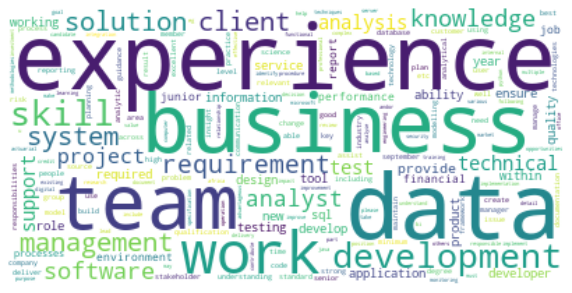

In [12]:
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(str(text))
plt.figure(figsize = (10, 15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

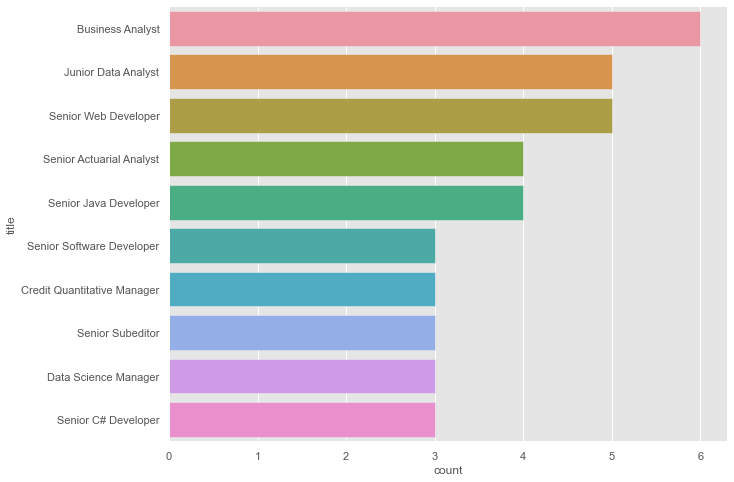

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(y= "title", data = jobs, order = jobs.title.value_counts().iloc[:10].index);